# Forecasting Weekly Department Sales using DeepAR in AWS

- 출처 : [https://medium.com/slalom-data-analytics/forecasting-weekly-department-sales-using-deepar-in-aws-5f7de09d0916](https://medium.com/slalom-data-analytics/forecasting-weekly-department-sales-using-deepar-in-aws-5f7de09d0916)

Knowing what you need and when you need it would be a great superpower. Imagine having the foresight to stock up on toilet paper before a pandemic. While the challenge of predicting when hand sanitizer will become an official form of currency is nearly impossible, far larger and more important challenges are already being solved with the help of forecasting.

Forecasting has been used all over the world to combat food shortages, provide pharmaceuticals to hospitals and pharmacies, and manage the manufacturing activity of essential goods. 

Retail companies use forecasting to keep just enough supply on hand for the customers that will purchase. 

Airlines use forecasting to plan their routes and maintain a mobile population. 

당신이 필요로 하는 것과 필요한 때를 아는 것은 위대한 초강대국이 될 것입니다. 전염병이 발생하기 전에 화장지를 비축할 수 있는 선견지명이 있다고 상상해 보십시오. 

손 소독제가 언제 공식 통화 형태가 될지 예측하는 것은 거의 불가능하지만 예측을 통해 훨씬 더 크고 더 중요한 과제가 이미 해결되고 있습니다. 

예측은 식량 부족을 해결하고, 병원과 약국에 의약품을 제공하고, 필수품의 제조 활동을 관리하기 위해 전 세계적으로 사용되었습니다. 

소매 회사는 예측을 사용하여 구매할 고객에게 충분한 공급을 유지합니다. 항공사는 예측을 사용하여 경로를 계획하고 유동 인구를 유지합니다. 





Each application of forecasting comes with its own challenges; two common challenges are:

1. Creating individual forecast models for every item, location, or situation is a massive undertaking 

2. Having the compute power to generate forecasts at a massive scale can be limiting/expensive

In order to take on these challenges, we will take you through an end-to-end solution leveraging Amazon Web Services (AWS) to train and deploy a forecasting model in the Cloud.

AWS SageMaker provides a large list of pre-built machine learning algorithms that make model training and deployment a breeze. 

Some initial configurations will be required to make sure that your data conforms to the proper format, but once that is completed, these algorithms handle most of the additional work.

Results from this demo will be generated by DeepAR, one of AWS’s machine learning algorithms for time-series forecasting.

예측 응용 프로그램에는 고유한 문제가 있습니다. 두 가지 일반적인 문제는 다음과 같습니다.

1. 모든 물품, 지역 또는 상황에 대한 개별 예측 모델을 만드는 것은 엄청난 작업입니다.

2. 대규모 예측을 생성할 수 있는 컴퓨팅 파워를 갖는 것은 제한적이거나 비쌀 수 있습니다.

이러한 문제를 해결하기 위해 Amazon Web Services(AWS)를 활용하여 클라우드에서 예측 모델을 교육하고 배포하는 종단 간 솔루션을 안내합니다.

AWS SageMaker는 모델 교육 및 배포를 쉽게 만드는 사전 구축된 기계 학습 알고리즘의 많은 목록을 제공합니다. 

데이터가 적절한 형식을 준수하는지 확인하기 위해 일부 초기 구성이 필요하지만 일단 완료되면 이러한 알고리즘이 대부분의 추가 작업을 처리합니다.

이 데모의 결과는 시계열 예측을 위한 AWS의 기계 학습 알고리즘 중 하나인 DeepAR에 의해 생성됩니다.

## SageMaker DeepAR

Before we get into the architecture and output of our solution, knowing the benefits and drawbacks of using DeepAR will help you decide if this is the right solution for your business case. 

Check out Failing Fast with DeepAR Neural Networks for Time-Series if you’re considering the time and resource investment involved.

The most popular methods of forecasting that data scientists typically use are ARIMA models (Auto Regressive Integrated Moving Average) and ETS models (Error, Trend, Seasonality). 

These methods are great for individual forecasts because they allow for a lot of fine tuning and experimentation to build a strong model.

However, when you want to create 100 different forecasts, DeepAR generally outperforms these methods, and is much easier to implement. 

DeepAR has the capability to learn from other related time series. Every time series feeds one model, rather than 100 different models.

The following are additional benefits and drawbacks of using DeepAR, following the development of our forecasting solution.

## SageMaker DeepAR

솔루션의 아키텍처 및 출력에 대해 알아보기 전에, DeepAR 사용의 장점과 단점을 알고 있으면 이것이 비즈니스 사례에 적합한 솔루션인지 결정하는 데 도움이 됩니다. 

관련된 시간과 리소스 투자를 고려하고 있다면 시계열용 DeepAR 신경망으로 빠른 결과를 확인하십시오.

데이터 과학자들이 일반적으로 사용하는 가장 인기 있는 예측 방법은 ARIMA 모델(자동 회귀 통합 이동 평균)과 ETS 모델(오차, 추세, 계절성)입니다. 

이러한 방법은 강력한 모델을 구축하기 위해 많은 미세 조정과 실험을 허용하기 때문에 개별 예측에 적합합니다.

그러나 100가지 다른 예측을 생성하려는 경우, DeepAR은 일반적으로 이러한 방법보다 성능이 뛰어나고 구현하기가 훨씬 쉽습니다. 

DeepAR은 다른 관련 시계열에서 학습할 수 있는 기능이 있습니다.

모든 시계열은 100개의 다른 모델이 아닌 하나의 모델을 제공합니다.

다음은 예측 솔루션 개발에 따른 DeepAR 사용의 추가 이점과 단점입니다.

### Benefits

1. Automation

• Forecast thousands of separate entities using one process

• Model training, tuning, and selection

2. What-If Analysis

• Change variables during prediction

• Simulates the effect without needing to retrain

3. Brand New Time Series

• Make new forecasts using only feature variables, no historical target data required

• Note: Can’t include a new feature set that the model hasn’t seen before. If new variables are being introduced, a trial period should be used to collect target data

### 장점

1. 자동화

• 하나의 프로세스를 사용하여 수천 개의 개별 엔터티 예측

• 모델 훈련, 조정 및 선택

2. 가정 분석

• 예측 중 변수 변경

• 재교육할 필요 없이 효과를 시뮬레이션합니다.

3. 새로운 시계열

• 기능 변수만 사용하여 새로운 예측을 하고 과거 target 데이터는 필요하지 않습니다.

• 참고: 모델이 이전에 사용 한 적이 없는 새로운 기능 변수들을 포함할 수 없습니다. 새로운 변수들이 도입되면, 훈련 기간을 사용하여 target 데이터를 수집해야 합니다.

### Drawbacks

1. Data Format

• Data must be formatted in a particular way. Find more about format here https://docs.aws.amazon.com/sagemaker/latest/dg/deepar.html#deepar-inputoutput

• Variables must be encoded, requires remapping post-prediction

2. ETL Efficiencies

• DeepAR requires the full set of data when making new predictions

• Growing datasets require built-in efficiencies when formatting and loading data

3. Model Performance

• All entities are tuned together

• No model tuning for individual time series

• Overall performance is fine, but some entities may suffer

- Generating a DeepAR model in SageMaker was a three-step process.

### 단점

1. 데이터 형식

• 데이터는 특정 방식으로 포맷되어야 합니다. 형식에 대한 자세한 내용은 https://docs.aws.amazon.com/sagemaker/latest/dg/deepar.html#deepar-inputoutput 에서 확인하십시오.

• 변수들은 인코딩되어야 하며 사후 예측을 다시 매핑해야 합니다.

2. ETL 효율성

• DeepAR은 새로운 예측을 할 때 전체 데이터 세트가 필요합니다.

• 증가하는 데이터 세트에는 데이터 형식 지정 및 로드 시 효율성이 필요합니다.

3. 모델 성능

• 모든 엔터티들이 함께 조정됩니다.

• 개별 시계열에 대한 모델 조정 없음

• 전반적인 성능은 양호하지만 일부 엔티티들에서 문제가 발생할 수 있음

  
  
- SageMaker에서 DeepAR 모델을 생성하는 것은 3단계 프로세스였습니다.
  


### Format Data

The data used for this demo represents weekly retail sales for 45 different stores with varying numbers of departments, totaling 2,660 individual time series. 

There are additional dynamic features and categorical features that feed our model as input variables. 

This dataset is a flat file with one row for every weekly observation.

In order to train a DeepAR model on this data, we must convert it from flat format to JSON. 

This process creates an object for every store-department combination, encodes categorical features as 0 to N-1 (where N is the number of levels to that feature), and tags it with the appropriate categorical and dynamic features. 

These JSON objects are output as three separate files: training, testing, and validation. 

Training and testing will be used by DeepAR. 

Validation was set aside for the purposes of this demo.


이 데모에 사용된 데이터는 다양한 부서의 45개 매장에 대한 주간 소매 판매를 나타내며 총 2,660개의 개별 시계열입니다. 

모델을 입력 변수들로 제공하는 추가 동적 특징들과 범주형 특징들이 있습니다. 

이 데이터세트는 매주 관찰할 때마다 하나의 행이 있는 고른 파일입니다.

이 데이터에 대해 DeepAR 모델을 훈련하려면, 플랫 형식에서 JSON으로 변환해야 합니다. 

이 프로세스는 모든 매장-부서 조합에 대한 개체를 만들고 범주형 특징들을 0에서 N-1(여기서 N은 해당 특징의 수준 수)로 인코딩하고 적절한 범주 및 동적 특징들로 태그를 지정합니다. 

이러한 JSON 개체들은 훈련, 테스트 및 유효성 검사의 세 가지 개별 파일들로 출력됩니다. 

훈련 및 테스트는 DeepAR에서 사용됩니다. 

이 데모의 목적을 위해 유효성 검사를 따로 두었습니다.

### Hyperparameter Tuning Job

Once the JSON files are loaded into Amazon S3, we are ready to start training the DeepAR model. 

This can either be done with pre-specified hyperparameters or by running a hyperparameter tuning job. 

Hyperparameter tuning will be more expensive, as it trains multiple times in hopes of producing a more accurate model, but is very often worth the results.

Hyperparameter tuning is accomplished in SageMaker by specifying static values for unchanging hyperparameters (such as time series frequency or the prediction length) and ranges of values for arbitrary hyperparameters (such as learning rate or epochs). 

These values and some basic configuration options become the definition for your tuning job. 

The time this process takes will vary depending on the compute size of your training instances, number of iterations specified in the tuning job, and the size of your dataset. 

For reference, 20 iterations on 3 ml.c4.2xlarge instances with our sample dataset took 3 hours.

The number of iterations will determine your coverage of potential hyperparameter values. 

One way to drill down on your optimal hyperparameters without increasing the time it takes is to use a random subset of stores while increasing iterations.

### 초매개변수 조정 작업

JSON 파일이 Amazon S3에 로드되면, DeepAR 모델을 훈련 될 시작준비가 됩니다. 

이것은 미리 지정된 하이퍼파라미터를 사용하거나 하이퍼파라미터 조정 작업을 실행하여 수행할 수 있습니다. 

하이퍼파라미터 튜닝은 더 정확한 모델을 생성하기 위해 여러 번 훈련하기 때문에 더 비싸지만 결과의 가치가 있는 경우가 많습니다.

SageMaker에서 하이퍼파라미터 조정은 변하지 않는 하이퍼파라미터(예: 시계열 빈도 또는 예측 길이)에 대한 정적 값과 임의의 하이퍼파라미터(예: 학습률 또는 epochs)에 대한 값 범위를 지정하여 수행됩니다. 

이러한 값과 일부 기본 구성 옵션들은 조정 작업에 대한 정의가 됩니다. 

이 프로세스에 걸리는 시간은 훈련 인스턴스의 계산 크기, 조정 작업에 지정된 반복 횟수, 데이터 세트 크기에 따라 다릅니다. 

참고로 샘플 데이터 세트를 사용하여 3 ml.c4.2xlarge 인스턴스에서 20회 반복하는 데 3시간이 걸렸습니다.

반복 횟수에 따라 잠재적인 초매개변수 값의 적용 범위가 결정됩니다.

소요 시간을 늘리지 않고 최적의 하이퍼파라미터를 드릴다운하는 한 가지 방법은 반복을 늘리면서 임의의 저장소 하위 집합을 사용하는 것입니다.


### Export Best Model

When hyperparameter tuning is complete, SageMaker will return every iteration as its own potential model. From these results we can collect the best-performing iteration and create a SageMaker Model for later inference.


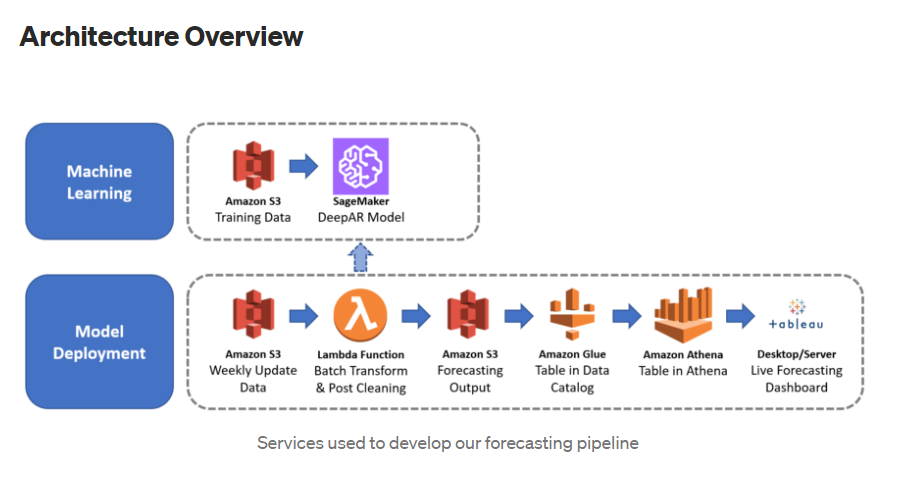

#### 다음 편에서 계속 됩니다.